***Load and Inspect the Dataset***

In [3]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Load the dataset
df = pd.read_csv("Leads.csv")

In [19]:
#Display basic info
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


***Handle the Missing Values***

In [27]:
#Check for missing Values
missing_values= df.isnull().sum()/len(df)*100
missing_values= missing_values[missing_values>0].sort_values(ascending=False)
print(missing_values)

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [29]:
# Drop columns with more than 40% missing values
df = df.drop(columns=['Lead Quality', 'Asymmetrique Profile Score', 
                      'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 
                      'Asymmetrique Activity Index'], axis=1)

In [35]:
# Fill categorical missing values with "Unknown"
categorical_cols = ['Tags', 'Lead Profile', 'What matters most to you in choosing a course', 
                    'What is your current occupation', 'Country', 
                    'How did you hear about X Education', 'Specialization', 'City']
for col in categorical_cols:
    df[categorical_cols] = df[categorical_cols].fillna("Unknown")


# Fill numerical missing values with median
numerical_cols = ['TotalVisits', 'Page Views Per Visit']
for col in numerical_cols:
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


# Check if any missing values remain
print(df.isnull().sum().sum())  # Should be 0 if all missing values are handled correctly


139


***Encoding Categorical Variables***

In [38]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Do Not Email' and 'Do Not Call' into binary (0 or 1)
df['Do Not Email'] = df['Do Not Email'].map({'Yes': 1, 'No': 0})
df['Do Not Call'] = df['Do Not Call'].map({'Yes': 1, 'No': 0})

# Drop ID columns as they are not useful for prediction
df = df.drop(columns=['Prospect ID', 'Lead Number'])

# Perform One-Hot Encoding on categorical columns
df = pd.get_dummies(df, drop_first=True)

# Display updated dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 183 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: bool(177), float64(2), int64(4)
memory usage: 2.0 MB
None


***Define Target Features***

In [41]:
# Define target variable
y = df['Converted']

# Drop the target column from features
X = df.drop(columns=['Converted'])

# Print shapes of feature and target datasets
print("Feature Matrix Shape:", X.shape)
print("Target Variable Shape:", y.shape)


Feature Matrix Shape: (9240, 182)
Target Variable Shape: (9240,)


***Split Data into Training and Test Sets***

In [44]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (7392, 182)
Test Data Shape: (1848, 182)


***Feature Scaling***

In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform on training data, transform on test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***Train Logistic Regression Model***

In [50]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Print model coefficients
print("Model Coefficients:\n", log_reg.coef_)

Model Coefficients:
 [[-3.49112608e-01  6.13661732e-02  1.35875469e-01  1.15166372e+00
  -7.30780051e-02 -1.98505361e-01  1.84651627e-01  3.24322631e-02
   6.85368662e-02 -2.58880744e-02 -1.98525556e-01 -3.34479505e-02
   2.72957648e-02  0.00000000e+00 -5.05981930e-02  4.76746109e-02
   0.00000000e+00 -4.72114807e-02 -3.51470463e-01 -2.11108801e-02
   0.00000000e+00  3.38045825e-02  2.46674006e-01  1.51071431e-02
   0.00000000e+00 -1.32081646e-01 -3.40156618e-02 -6.03312446e-02
   0.00000000e+00 -2.13943895e-01 -4.10717108e-01  7.03155156e-02
   0.00000000e+00 -1.03963411e-01  2.66298530e-02 -1.23154324e-02
  -1.30130033e-01 -3.01599615e-01 -1.49559385e-01  4.48330278e-02
   5.71681364e-01 -2.80964846e-03  1.54875258e-02  3.15443603e-02
  -1.31217294e-02 -8.23720940e-02 -2.59487262e-02 -4.51545859e-02
  -7.33851554e-02 -8.75450417e-02 -7.59718993e-02  2.13763102e-02
  -5.57558394e-02  8.16765267e-02 -8.20265918e-02  9.06484629e-02
  -2.28038823e-01 -4.19416508e-02 -6.16060690e-02 -2.75

***Model Evaluation***

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# Model evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9291125541125541

Confusion Matrix:
 [[1080   56]
 [  75  637]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1136
           1       0.92      0.89      0.91       712

    accuracy                           0.93      1848
   macro avg       0.93      0.92      0.92      1848
weighted avg       0.93      0.93      0.93      1848



***Generate Lead Scores***

In [56]:
# Generate lead scores (probability of conversion)
lead_scores = log_reg.predict_proba(X_test_scaled)[:, 1] * 100  # Convert to 0-100 scale

# Add lead scores to the test dataset
test_results = X_test.copy()
test_results['Converted'] = y_test
test_results['Lead Score'] = lead_scores

# Display the first few rows
print(test_results[['Lead Score', 'Converted']].head())

      Lead Score  Converted
683    20.527752          1
1931   97.917132          1
6950    3.345244          0
2996    0.075167          0
3902    0.094800          0


***Analyze Lead Score Distribution***

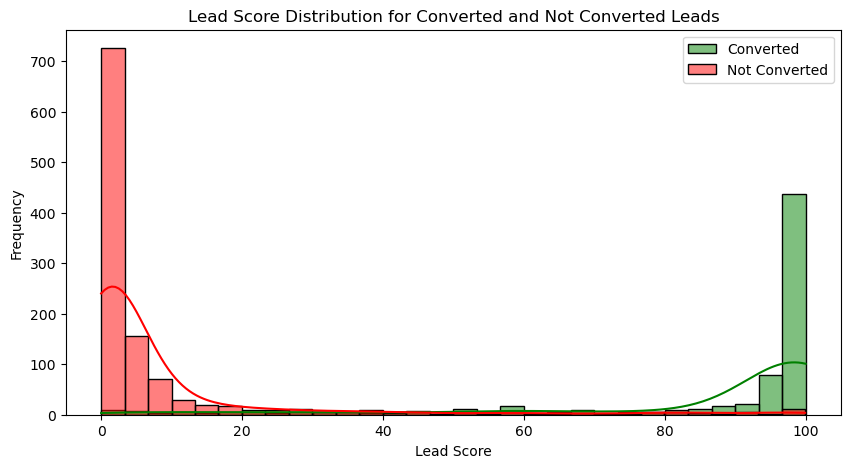

In [59]:
# Plot the distribution of lead scores for converted and non-converted leads
plt.figure(figsize=(10,5))
sns.histplot(test_results[test_results['Converted'] == 1]['Lead Score'], bins=30, color='green', label='Converted', kde=True)
sns.histplot(test_results[test_results['Converted'] == 0]['Lead Score'], bins=30, color='red', label='Not Converted', kde=True)
plt.xlabel("Lead Score")
plt.ylabel("Frequency")
plt.title("Lead Score Distribution for Converted and Not Converted Leads")
plt.legend()
plt.show()

***Optimize Model Performance***

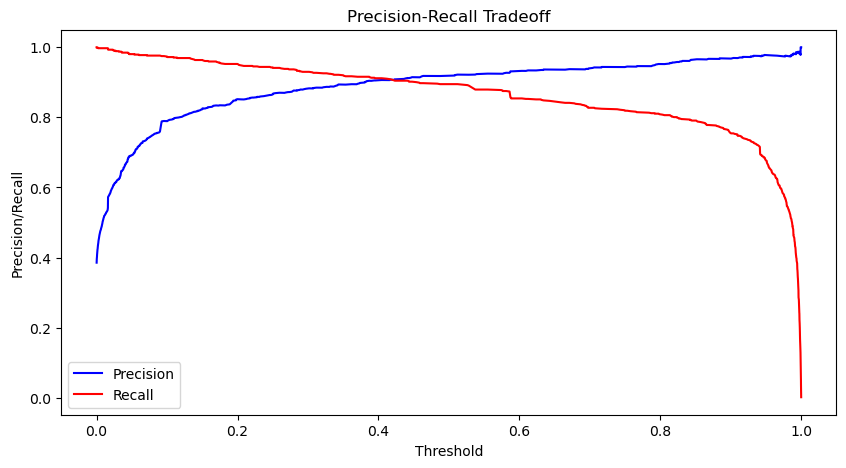

In [62]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, lead_scores / 100)

# Plot Precision-Recall curve
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions[:-1], label="Precision", color='blue')
plt.plot(thresholds, recalls[:-1], label="Recall", color='red')
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.show()


In [64]:
# Set a custom threshold (e.g., 30 instead of 50)
threshold = 30  # Adjust this based on the Precision-Recall tradeoff

# Classify leads based on new threshold
test_results['Predicted Conversion'] = (test_results['Lead Score'] > threshold).astype(int)

# Evaluate new classification
from sklearn.metrics import confusion_matrix

print("Confusion Matrix after Threshold Adjustment:\n", confusion_matrix(y_test, test_results['Predicted Conversion']))


Confusion Matrix after Threshold Adjustment:
 [[1048   88]
 [  50  662]]


In [66]:
# Get feature importance from logistic regression model
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display top features
print(feature_importance.head(10))  # Top positive features
print(feature_importance.tail(10))  # Top negative features


                                            Feature  Coefficient
146        Tags_Will revert after reading the email     2.720664
144                                    Tags_Unknown     1.982004
128                         Tags_Closed by Horizzon     1.844324
136                               Tags_Lost to EINS     1.286330
3                       Total Time Spent on Website     1.151664
40                           Last Activity_SMS Sent     0.571681
178                  Last Notable Activity_SMS Sent     0.442961
173  Last Notable Activity_Had a Phone Conversation     0.414816
165                                    City_Unknown     0.370146
127                                       Tags_Busy     0.344483
                                               Feature  Coefficient
18                               Lead Source_Reference    -0.351470
151                                  Tags_switched off    -0.400445
30                         Last Activity_Email Bounced    -0.410717
140          

In [68]:
# Compare mean lead scores for converted and non-converted leads
print("Average Lead Score for Converted Leads:", test_results[test_results['Converted'] == 1]['Lead Score'].mean())
print("Average Lead Score for Non-Converted Leads:", test_results[test_results['Converted'] == 0]['Lead Score'].mean())

Average Lead Score for Converted Leads: 86.68281390031721
Average Lead Score for Non-Converted Leads: 8.200185188741667
